In [1]:
import tweepy as tw
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [3]:
consumer_key= 'insert'
consumer_secret= 'insert'
access_token= 'insert'
access_token_secret= 'insert'

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [20]:
user_info = api.get_user("lateefsaka")
print(user_info)

User(_api=<tweepy.api.API object at 0x7fc59400ba50>, _json={'id': 110224423, 'id_str': '110224423', 'name': 'Lateef', 'screen_name': 'LateefSaka', 'location': 'Paris/London', 'profile_location': None, 'description': 'Skin care | Art | Travel | Finance | featured in @MTVUK @yahoostyleuk @glamourmag @Guardian @Buzzfeeduk // SOAS, Warwick Grad', 'url': 'https://t.co/61UN4acQrS', 'entities': {'url': {'urls': [{'url': 'https://t.co/61UN4acQrS', 'expanded_url': 'http://youtube.com/lateefsaka', 'display_url': 'youtube.com/lateefsaka', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 26736, 'friends_count': 2535, 'listed_count': 93, 'created_at': 'Sun Jan 31 20:13:39 +0000 2010', 'favourites_count': 32334, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 67976, 'lang': None, 'status': {'created_at': 'Tue Sep 06 11:57:17 +0000 2022', 'id': 1567119744058245121, 'id_str': '1567119744058245121', 'text': 'I lo

In [33]:
user = "lateefsaka"

In [39]:
tweets = tw.Cursor(api.user_timeline,
                   screen_name = user,
                   count = None,
                   since_id = None,
                   max_id = None, trim_user = True, exclude_retweets = True, contributor_details = False,
                   include_entities = False).items(2000);

In [40]:
df = pd.DataFrame(data =[tweet.text for tweet in tweets], columns = ["Tweet"])

In [43]:
df.head(100)

,Tweet
0,I love and hate my friends in equal measure be...
1,@khalnero What again? What did I do
2,My friend called himself a celestial being las...
3,@whereswunmi The way I will go to the kitchen ...
4,"Gbese, I would fall down 😭 https://t.co/udSc2Y..."
...,...
95,@iamdlbuk I hate I read this whole thread. Her...
96,RT @finianhackett: RIP Josephine Tewson aka th...
97,@Stuckinlondon1 It’s the subtle fascination wi...
98,Is no one ever shocked when it’s the other way...


In [55]:
import re
def cleaner(txt):
  txt = re.sub(r'@[A-Za-z0-9_]+', '',txt)
  txt = re.sub(r'#', '', txt)
  txt = re.sub(r'RT : ', '', txt)
  txt = re.sub(r"http\S+", "", txt) #removed URL!

  return txt

df["clean"] = df["Tweet"].map(lambda x: cleaner(x))

In [56]:
df.head()

,Tweet,clean
0,I love and hate my friends in equal measure be...,I love and hate my friends in equal measure be...
1,@khalnero What again? What did I do,What again? What did I do
2,My friend called himself a celestial being las...,My friend called himself a celestial being las...
3,@whereswunmi The way I will go to the kitchen ...,The way I will go to the kitchen / bar myself...
4,"Gbese, I would fall down 😭 https://t.co/udSc2Y...","Gbese, I would fall down 😭"


In [57]:
import matplotlib.pyplot as plt
import numpy as np

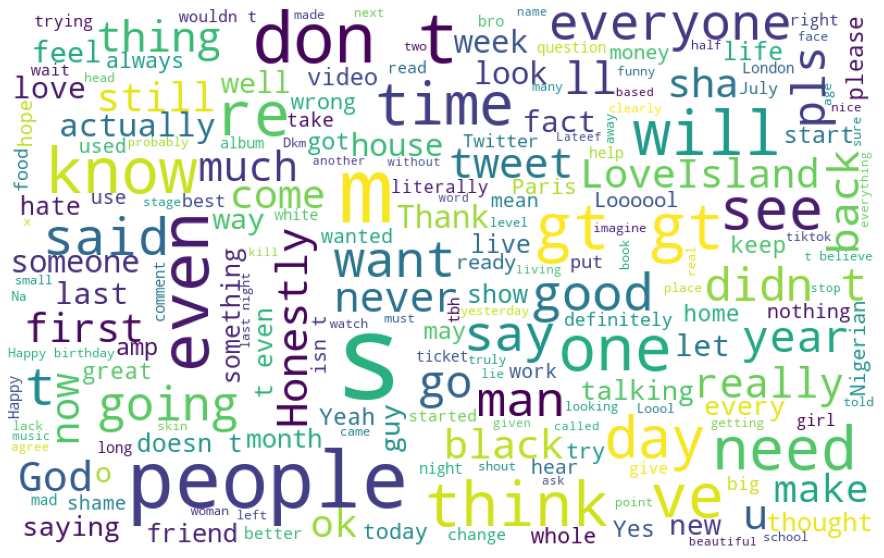

In [58]:
all_words = ' '.join([text for text in df['clean']])
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'white', width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [74]:
user_info = api.get_user("maryannnotmary")
print(user_info)

User(_api=<tweepy.api.API object at 0x7fc59400ba50>, _json={'id': 3387692489, 'id_str': '3387692489', 'name': 'MaryAnn 🌸', 'screen_name': 'maryannnotmary', 'location': 'London', 'profile_location': None, 'description': 'It’s all God 🤸🏾 @farailondon \U0001f90d', 'url': 'https://t.co/ePgWvrvuZX', 'entities': {'url': {'urls': [{'url': 'https://t.co/ePgWvrvuZX', 'expanded_url': 'http://Instagram.com/okaymaryann', 'display_url': 'Instagram.com/okaymaryann', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 20173, 'friends_count': 834, 'listed_count': 43, 'created_at': 'Wed Jul 22 17:54:43 +0000 2015', 'favourites_count': 9740, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': False, 'statuses_count': 10131, 'lang': None, 'status': {'created_at': 'Tue Sep 06 10:13:29 +0000 2022', 'id': 1567093622419460096, 'id_str': '1567093622419460096', 'text': 'Styles which didn’t make the cut but now I’m like hmmmm thoughts? (Pink is backles

In [78]:
user2 = "maryannnotmary"

In [79]:
tweets = tw.Cursor(api.user_timeline,
                   screen_name = user2,
                   count = None,
                   since_id = None,
                   max_id = None, trim_user = True, exclude_retweets = True, contributor_details = False,
                   include_entities = False).items(2000);

In [80]:
df1 = pd.DataFrame(data =[tweet.text for tweet in tweets], columns = ["Tweet"])

In [81]:
df1.head(100)

,Tweet
0,Styles which didn’t make the cut but now I’m l...
1,I hate that my birthday is on a Tuesday 🤬
2,@jadethetallone you have educated me today on ...
3,RT @jameelajoie: .@FaraiLondon 🫶🏿
4,Once Evri say your delivery is delayed you ain...
...,...
95,@vpungs @FaraiLondon Wow she was the realist a...
96,Shoes🫶🏿
97,Top 3? Impossicant I have 8 songs that are cur...
98,I’ve only listened up to energy because I keep...


In [82]:
import re
def cleaner(txt):
  txt = re.sub(r'@[A-Za-z0-9_]+', '',txt)
  txt = re.sub(r'#', '', txt)
  txt = re.sub(r'RT : ', '', txt)
  txt = re.sub(r"http\S+", "", txt) #removed URL!

  return txt

df1["clean"] = df1["Tweet"].map(lambda x: cleaner(x))

In [83]:
df1.head()

,Tweet,clean
0,Styles which didn’t make the cut but now I’m l...,Styles which didn’t make the cut but now I’m l...
1,I hate that my birthday is on a Tuesday 🤬,I hate that my birthday is on a Tuesday 🤬
2,@jadethetallone you have educated me today on ...,you have educated me today on mp’s and pm’s
3,RT @jameelajoie: .@FaraiLondon 🫶🏿,. 🫶🏿
4,Once Evri say your delivery is delayed you ain...,Once Evri say your delivery is delayed you ain...


In [91]:
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [92]:
stop_words = STOPWORDS.update(["ve", "t", "s", "v", "m", "gt"])

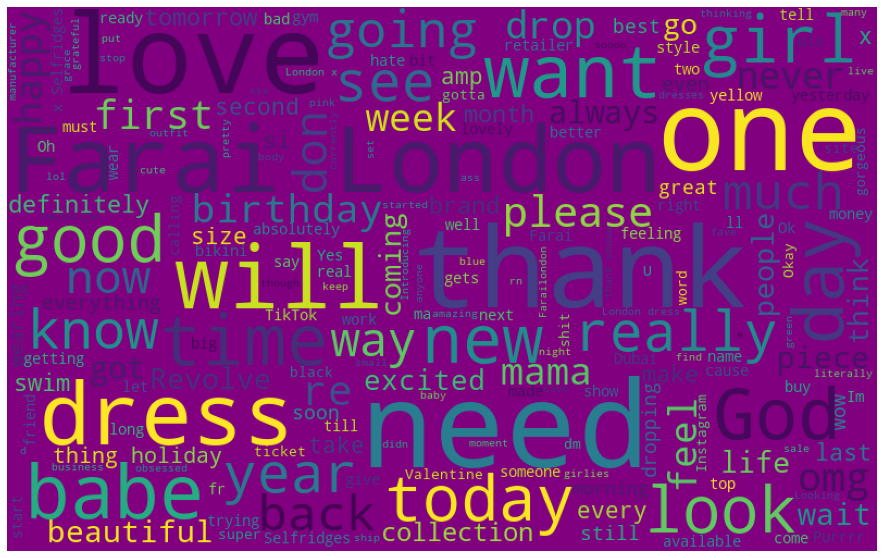

In [93]:
all_words = ' '.join([text for text in df1['clean']])
wordcloud = WordCloud(stopwords = stop_words, background_color = 'purple', width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()